In [2]:
#import necessary packages


try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

the following code by Aric Hagberg (hagberg@lanl.gov) reads the 'football network' gml file directly from the 
internet. If you have the gml file downloaded to your hard drive you may also simply load it via

G = nx.read_gml('football.gml')

In [3]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



In [4]:
G.nodes

NodeView(('BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCa

In [5]:
# The gml file also contains the node attribute 'value' which indicates the particular conference the teams belong to
# (see readme above). We extract them by parsing the gml file by hand since the 'value' attribute is not read by 
# football.gml.

searchfile = gml
nodelabels = []
for line in searchfile:
    if "value" in line: nodelabels.append(int(line[-2:]))
print(nodelabels)

[7, 0, 2, 3, 7, 3, 2, 8, 8, 7, 3, 10, 6, 2, 6, 2, 7, 9, 6, 1, 9, 8, 8, 7, 10, 0, 6, 9, 11, 1, 1, 6, 2, 0, 6, 1, 5, 0, 6, 2, 3, 7, 5, 6, 4, 0, 11, 2, 4, 11, 10, 8, 3, 11, 6, 1, 9, 4, 11, 10, 2, 6, 9, 10, 2, 9, 4, 11, 8, 10, 9, 6, 3, 11, 3, 4, 9, 8, 8, 1, 5, 3, 5, 11, 3, 6, 4, 9, 11, 0, 5, 4, 4, 7, 1, 9, 9, 10, 3, 6, 2, 1, 3, 0, 7, 0, 2, 3, 8, 0, 4, 8, 4, 9, 11]


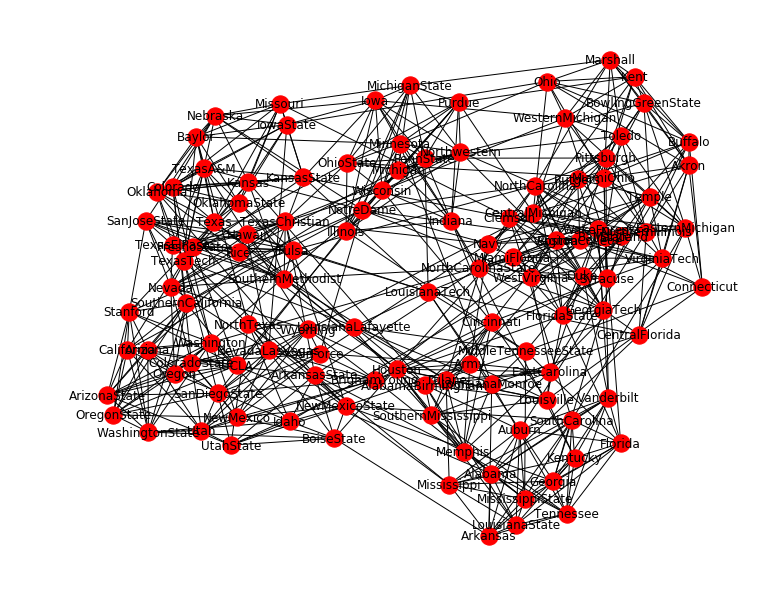

In [6]:
#draw the graph. We don't really see anything though!
plt.figure(figsize=(10,8))
nx.draw(G, with_labels=True)
plt.show()

In [7]:
# create adjacency matrix
A = nx.to_numpy_matrix(G)